In [2]:
import numpy as np
import pandas as pd
import sklearn

In [3]:
# Read in the data file
data = np.loadtxt('airfoil_self_noise.dat')#, unpack=True)
print(np.shape(data))

(1503, 6)


In [4]:
x = data[:, :-1]
y = data[:, -1]

# Normalize things into [-1, 1]
x_max = np.max(x, axis=0)
x_min = np.min(x, axis=0)
x_mid = (x_max + x_min) / 2
x_range = (x_max - x_min)
y_max = np.max(y)
y_min = np.min(y)
y_mid = (y_max + y_min) / 2
y_range = (y_max - y_min)

x = ((x - x_min)/x_range - 0.5) * 2
y = ((y - y_min)/y_range - 0.5) * 2

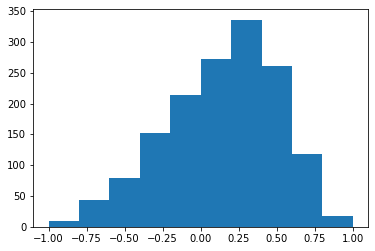

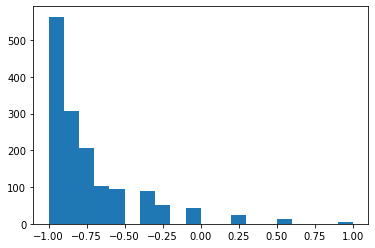

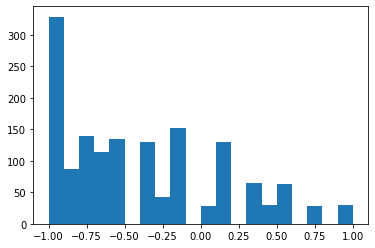

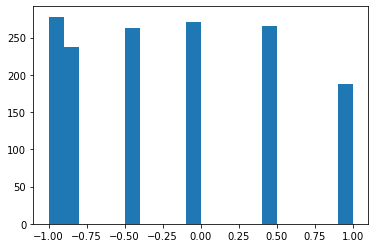

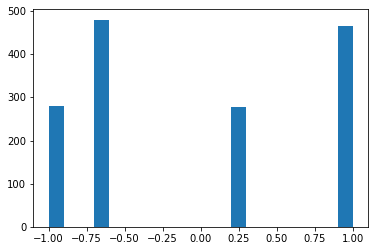

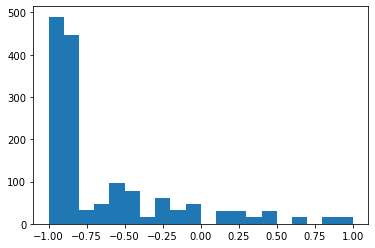

In [5]:
import matplotlib.pyplot as plt
plt.hist(y)
# Histogram of each dimension
for i in range(5):
    f = plt.figure()
    plt.hist(x[:, i], bins=20)

In [6]:
# Split the train test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
# Train a random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
clf = RandomForestRegressor(n_estimators=50, max_depth=15, random_state=0)
# clf = LinearRegression()
clf.fit(x_train, y_train)
print('training score:', clf.score(x_train, y_train))
print('testing score:', clf.score(x_test, y_test))

training score: 0.9898305120391255
testing score: 0.9391261425002368


In [8]:
# Evaluate the MSE difference
test_MSE = np.mean(np.square(y_test - clf.predict(x_test)))
train_MSE = np.mean(np.square(y_train - clf.predict(x_train)))

In [9]:
print('training MSE =', train_MSE)
print('testing MSE =', test_MSE)

training MSE = 0.001349395969628577
testing MSE = 0.008625391833368244


In [10]:
# MSE for predicting the mean
print(np.mean(np.square(y_train - np.mean(y_train))))
print(np.mean(np.square(y_test - np.mean(y_test))))

0.1326906501900752
0.14169287420961943


In [11]:
import joblib
joblib.dump(clf, "airfoil_oracle_rf.joblib")

['airfoil_oracle_rf.joblib']

In [12]:
print(np.shape(y))
y_expand = np.expand_dims(y, axis=1)

(1503,)


## Getting the dataset for inspection

In [13]:
# Generate random points
x_random = np.random.uniform(size=[2000, 5]) * 2 - 1
# Get the prediction of these random points
y_random = clf.predict(x_random)

# Get the test set
x_test = np.random.uniform(size=[20000, 5]) * 2 - 1
# Get the prediction of these random points
y_test = clf.predict(x_test)

(-1.0, 1.0)

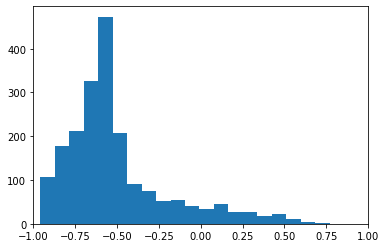

In [14]:
plt.hist(y_random, bins=20)
plt.xlim([-1, 1])

In [15]:
y_random = np.expand_dims(y_random, axis=1)
xy = np.concatenate([x_random, y_random], axis=1)
print(np.shape(xy))
np.save('test_data.npy', xy)

(2000, 6)


In [16]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(hidden_layer_sizes=(200, 200, 200, 200), max_iter=500).fit(x_random, y_random)
# regr = MLPRegressor(hidden_layer_sizes=(200, 200, 200, 200, 200, 200),random_state=1, max_iter=500).fit(x_train, y_train)

/home/sr365/anaconda3/envs/benicml/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
print('training MSE =', np.mean(np.square(y_random - regr.predict(x_random))))
print('testing MSE =', np.mean(np.square(y_test - regr.predict(x_test))))


training MSE = 0.19282860220212125
testing MSE = 0.005549518158874991


In [18]:
print(np.shape(regr.predict(x_random)))

(2000,)
